<div align = "center">
<h1 >  ASSOCIATION RULES AND LIFT ANALYSIS </h1>
<h2> Jaouad Safouani </h2>
</div>

<h3> Scenario 1 </h3>

One of the most critical factors in customer relationship management that directly affects a company’s long-term profitability is understanding its customers. When a company can better understand its customer characteristics, it is better able to target products and marketing campaigns for customers, resulting in better profits for the company in the long term.

You are an analyst for a telecommunications company that wants to better understand the characteristics of its customers. You have been asked to perform a market basket analysis to analyze customer data to identify key associations of your customer purchases, ultimately allowing better business and strategic decision-making.

* [A1:PROPOSAL OF QUESTION](#A1)
* [A2:DEFINED GOAL](#A2)
* [B1:EXPLANATION OF MARKET BASKET](#B1)
* [B2:TRANSACTION EXAMPLE](#B2) 
* [B3:MARKET BASKET ASSUMPTION](#B3)
* [C1:TRANSFORMING THE DATASET](#C1) 
* [C2:CODE EXECUTION](#C2)
* [C3:ASSOCIATION RULES TABLE](#C3) 
* [C4:TOP THREE RULES](#C4)
* [D1:SIGNIFICANCE OF SUPPORT, LIFT, AND CONFIDENCE SUMMARY](#D1) 
* [D2:PRACTICAL SIGNIFICANCE OF FINDINGS](#D2)
* [D3:COURSE OF ACTION](#D3) 
* [E:PANOPTO RECORDING](#E)
* [F:WEB SOURCES](#F) 
* [G:SOURCES](#G)

<h2> <a id="A1"> A1:PROPOSAL OF QUESTION  </a> </h2>

As an analyst at the WGU Telecommunications, I was asked to analyze the data and find customer purchasing patterns using market basket analysis. Can we recommend a product or products to customers based on what they add to their shopping carts?

<h2> <a id="A1"> A2:DEFINED GOAL  </a> </h2>

The marketing department would like to be able to understand the customers purchasing patterns from historical data. This will allow the marketing department to create a recommendation system to customers based on what other purchase with a certain product or combination of products. Therefore, the end result is to increase in sales and profit adn reduce churn rate. The marketing departement will be building a recommendation system that will target people based on items purchased together. This will result in loyal customer that purchase product they need.  

<h2> <a id="A1"> B1:EXPLANATION OF MARKET BASKET </a> </h2>

In his blog in medium, Shah explained in his bloc that the market basket analysis is a data mining technique used by retailers to increase sales. The analysis allows the retailers to understand customer purchasing patterns from purchase history, reaviling product groupings and prodcuts that are likely to be purchase together. The idea is to find relationships between products purchased together at the transaction level using association rules concept. Association rules look at the frequency of products purchased together at the transaction level. Retailers will be able to use this concept to recommend products that are frequently purchased together with a product that a cusotmer is purchasing. 

<h3> Code & Exploratory Analysis </h3>

In [1]:
#importing libraries
import pandas as pd 
# display all columns in the dataframe.
pd.set_option('max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)
%matplotlib inline
# import seaborn as sns 
# sns.set(style="whitegrid", color_codes=True)
from mlxtend.frequent_patterns import apriori,association_rules
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('churn_clean.csv')

In [3]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
print(sorted(list(df.columns)))

['Age', 'Area', 'Bandwidth_GB_Year', 'CaseOrder', 'Children', 'Churn', 'City', 'Contacts', 'Contract', 'County', 'Customer_id', 'DeviceProtection', 'Email', 'Gender', 'Income', 'Interaction', 'InternetService', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Job', 'Lat', 'Lng', 'Marital', 'MonthlyCharge', 'Multiple', 'OnlineBackup', 'OnlineSecurity', 'Outage_sec_perweek', 'PaperlessBilling', 'PaymentMethod', 'Phone', 'Population', 'Port_modem', 'State', 'StreamingMovies', 'StreamingTV', 'Tablet', 'TechSupport', 'Techie', 'Tenure', 'TimeZone', 'UID', 'Yearly_equip_failure', 'Zip']


In [5]:
df.shape

(10000, 50)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

There are no missing values in the dataset.

<h3> <a id="A1"> Products </a> </h3>

Transaction Items in the churn dataset:
* InternetService Customer’s internet service provider (DSL, fiber optic, None)
* Phone: Whether the customer has a phone service (yes, no)
* Multiple: Whether the customer has multiple lines (yes, no)
* OnlineSecurity: Whether the customer has an online security add on (yes, no)
* OnlineBackup: Whether the customer has an online backup add on (yes, no)
* DeviceProtection: Whether the customer has device protection add on (yes, no)
* TechSupport Whether the customer has a technical support add on (yes, no)
* StreamingTV Whether the customer has streaming TV (yes, no)
* StreamingMovies: Whether the customer has streaming movies (yes, no)

In [7]:
var_to_keep = ['Customer_id','Phone','OnlineSecurity','OnlineBackup','TechSupport','DeviceProtection','StreamingTV',
          'StreamingMovies','PaperlessBilling','InternetService']

In [8]:
# Keep Transaction items only
df = df[var_to_keep]

In [9]:
df.duplicated().sum()

0

In [10]:
df.head()

,Customer_id,Phone,OnlineSecurity,OnlineBackup,TechSupport,DeviceProtection,StreamingTV,StreamingMovies,PaperlessBilling,InternetService
0,K409198,Yes,Yes,Yes,No,No,No,Yes,Yes,Fiber Optic
1,S120509,Yes,Yes,No,No,No,Yes,Yes,Yes,Fiber Optic
2,K191035,Yes,No,No,No,No,No,Yes,Yes,DSL
3,D90850,Yes,Yes,No,No,No,Yes,No,Yes,DSL
4,K662701,No,No,No,Yes,No,Yes,No,No,Fiber Optic


<h3> <a id="A1"> Re-expression  </a> </h3>

In [11]:
# create a dictionary with columns and their datatype. 
dict_col_type = dict()
for col in list(df.columns):
    dict_col_type[col] = df[col].dtypes

In [12]:
dict_col_type

{'Customer_id': dtype('O'),
 'Phone': dtype('O'),
 'OnlineSecurity': dtype('O'),
 'OnlineBackup': dtype('O'),
 'TechSupport': dtype('O'),
 'DeviceProtection': dtype('O'),
 'StreamingTV': dtype('O'),
 'StreamingMovies': dtype('O'),
 'PaperlessBilling': dtype('O'),
 'InternetService': dtype('O')}

In [13]:

# Get the columns with string values and a lis the numerical columns.
list_object_col  =[]
list_numeric_col =[]
for col , _type in dict_col_type.items():
    if 'object' in str(_type):
        list_object_col.append(col)
    else:
        list_numeric_col.append(col)
#Assign unique values for each object variable and store data in a dictionary        
dict_col_withdistinct_values=dict()
for col in list_object_col:
    dict_col_withdistinct_values[col]= df[col].unique()

In [14]:
# identify columns with Yes/ NO
# We will use ordinal Encoding for variables with Yes No
# and One hot Encoding for the other categorical non ordinal columns.
List_var_Yes_No=[]
List_var_Other=[]
for key,values in dict_col_withdistinct_values.items():
    if 'No' in values and 'Yes' in values:
        List_var_Yes_No.append(key)
    else:
        List_var_Other.append(key)

In [15]:
List_var_Yes_No

['Phone',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'DeviceProtection',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling']

In [16]:
List_var_Other

['Customer_id', 'InternetService']

<h3> <a id="A1"> Ordinal Encoding </a> </h3>

In [17]:
# Defining the map function to replace Yes and No with 1 and 0
# Ordinal Encoding
def Yes_No_dict_map(x):
    ''' Ordinal Encoding '''
    return x.map({'Yes':1, 'No':0})

In [18]:
# Replace the Yes and No with 1 and 0 in binary variables.
# Applying Ordinal encoding to Re express Yes No to 1 and 0 respectevely.
df[List_var_Yes_No]=df[List_var_Yes_No].apply(Yes_No_dict_map)

In [19]:
#Verifying that the encoding was successful
df[List_var_Yes_No].head()

,Phone,OnlineSecurity,OnlineBackup,TechSupport,DeviceProtection,StreamingTV,StreamingMovies,PaperlessBilling
0,1,1,1,0,0,0,1,1
1,1,1,0,0,0,1,1,1
2,1,0,0,0,0,0,1,1
3,1,1,0,0,0,1,0,1
4,0,0,0,1,0,1,0,0


<h3> <a id=""> One-Hot Encoding </a> </h3>

In [20]:
# OneHot Endcoding on the InternetService
col ='InternetService'
df_ = pd.get_dummies(df[col], drop_first = False).astype('int64')
transactions = pd.concat([df, df_], axis = 1)

In [21]:
#dropped the None Column and the InternetService
transactions.drop(columns = ['None',col], inplace = True)

<h2> <a id="A1"> B2:TRANSACTION EXAMPLE </a> </h2>

In [22]:
# first transaction in df
transactions.head(1)

,Customer_id,Phone,OnlineSecurity,OnlineBackup,TechSupport,DeviceProtection,StreamingTV,StreamingMovies,PaperlessBilling,DSL,Fiber Optic
0,K409198,1,1,1,0,0,0,1,1,0,1


Here is an example of a transaction. The customer K409198 purchased the following services: Phone, OnlineSecurity, OnlineBackup, StreamingMovies, and Fiber Optic.

<h2> <a id="A1"> B3:MARKET BASKET ASSUMPTION  </a> </h2>

The assumption of the market basket analysis can be summarized as follows:
The purchase of one or more products leads to the purchase of another or other products based on the analysis of historic transactional data. 

<h2> <a id="A1"> C1:TRANSFORMING THE DATASET  </a> </h2>

In [23]:
#Top 5  transactions
transactions.head()

,Customer_id,Phone,OnlineSecurity,OnlineBackup,TechSupport,DeviceProtection,StreamingTV,StreamingMovies,PaperlessBilling,DSL,Fiber Optic
0,K409198,1,1,1,0,0,0,1,1,0,1
1,S120509,1,1,0,0,0,1,1,1,0,1
2,K191035,1,0,0,0,0,0,1,1,1,0
3,D90850,1,1,0,0,0,1,0,1,1,0
4,K662701,0,0,0,1,0,1,0,0,0,1


In [24]:
# make a copy to csv of the oreoared data.
transactions.to_csv("prepared_churn_clean.csv")

<h2> <a id="A1"> C2:CODE EXECUTION  </a> </h2>

In [25]:
basket_col = [c for c in transactions.columns if c != 'Customer_id']
basket = transactions[basket_col]
basket.head()

,Phone,OnlineSecurity,OnlineBackup,TechSupport,DeviceProtection,StreamingTV,StreamingMovies,PaperlessBilling,DSL,Fiber Optic
0,1,1,1,0,0,0,1,1,0,1
1,1,1,0,0,0,1,1,1,0,1
2,1,0,0,0,0,0,1,1,1,0
3,1,1,0,0,0,1,0,1,1,0
4,0,0,0,1,0,1,0,0,0,1


Please see below the code to generate the association rules

<h2> <a id="A1"> C3:ASSOCIATION RULES TABLE </a> </h2>

In [26]:
# Using Apriori algarithm to generat a list of products frequently
# purchased together up to 6 items at once per occurance for all products in churn dataset.
frequent_itemsets = apriori(basket, min_support= len(basket.columns)/len(basket), use_colnames=True, max_len = 6)
# frequent_itemsets

# Identifying the association rulesusing the association_rules for the
# identified frequent products with Lift method and a minimum Threshold of 1.3

asso_rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.3)
# Top 5 rules
asso_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(OnlineSecurity, StreamingTV, OnlineBackup, Te...","(DeviceProtection, DSL)",0.0280,0.1496,0.0058,0.207143,1.384645,0.001611,1.072577
1,"(TechSupport, StreamingTV, DeviceProtection, O...","(OnlineSecurity, DSL)",0.0346,0.1240,0.0058,0.167630,1.351855,0.001510,1.052417
2,"(OnlineSecurity, DeviceProtection, DSL)","(TechSupport, StreamingTV, OnlineBackup)",0.0546,0.0793,0.0058,0.106227,1.339560,0.001470,1.030127
3,"(TechSupport, StreamingTV, OnlineBackup)","(OnlineSecurity, DeviceProtection, DSL)",0.0793,0.0546,0.0058,0.073140,1.339560,0.001470,1.020003
4,"(OnlineSecurity, DSL)","(TechSupport, StreamingTV, DeviceProtection, O...",0.1240,0.0346,0.0058,0.046774,1.351855,0.001510,1.012772


In [27]:
print("We identified: ", len(asso_rules), 'assiciated rules')

We identified:  32 assiciated rules


<h2> <a id="A1"> C4:TOP THREE RULES </a> </h2>

In [28]:
# Create function to print the explanation of the top i association rules.
def print_association_rules():
    ''' Print the explanation of the top i associations rules'''
    antecedents_ = asso_rules['antecedents'].iloc[0]
    consequents_ = asso_rules['consequents'].iloc[0]
    print("Customers who are buying {} are likely to buy {}.".format(antecedents_,consequents_))


<h4> <a id=""> Top rules by Support </a> </h4>

In [29]:
asso_rules.sort_values(by ='support', ascending = False, inplace = True)
asso_rules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,"(OnlineSecurity, StreamingTV, DeviceProtection)","(OnlineBackup, DSL, StreamingMovies)",0.0806,0.0757,0.008,0.099256,1.311170,0.001899,1.026151
11,"(OnlineSecurity, DeviceProtection, DSL, Stream...","(StreamingTV, OnlineBackup)",0.0269,0.2201,0.008,0.297398,1.351194,0.002079,1.110016
19,"(OnlineSecurity, DeviceProtection, DSL)","(OnlineBackup, StreamingTV, StreamingMovies)",0.0546,0.1071,0.008,0.146520,1.368069,0.002152,1.046188


In [30]:
print_association_rules()

Customers who are buying frozenset({'OnlineSecurity', 'StreamingTV', 'DeviceProtection'}) are likely to buy frozenset({'OnlineBackup', 'DSL', 'StreamingMovies'}).


The support is the count of an Item or itemset in a dataset divided by the total of transactions. The highest support is 0.008.
The <b> frozenset({'DSL', 'DeviceProtection', 'StreamingTV'}) </b> occurs % 0.8  transaction dataset with a support of 0.008.

<h4> <a id=""> Top rules by Confidence </a> </h4>

In [31]:
asso_rules.sort_values(by ='lift', ascending = False, inplace = True)
asso_rules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(OnlineSecurity, StreamingTV, OnlineBackup, Te...","(DeviceProtection, DSL)",0.0280,0.1496,0.0058,0.207143,1.384645,0.001611,1.072577
5,"(DeviceProtection, DSL)","(OnlineSecurity, StreamingTV, OnlineBackup, Te...",0.1496,0.0280,0.0058,0.038770,1.384645,0.001611,1.011204
15,"(OnlineSecurity, StreamingTV, OnlineBackup)","(DeviceProtection, DSL, StreamingMovies)",0.0779,0.0750,0.0080,0.102696,1.369277,0.002158,1.030866


In [32]:
print_association_rules()

Customers who are buying frozenset({'OnlineSecurity', 'StreamingTV', 'OnlineBackup', 'TechSupport'}) are likely to buy frozenset({'DeviceProtection', 'DSL'}).


The Lift is the the improvement in rules against all the dataset also called the the strength of association. The highest lift in this dataset is 1.38. for the rule:

<b> frozenset({'DSL', 'DeviceProtection'})  ==> frozenset({'TechSupport', 'StreamingTV', 'OnlineSecurity', 'OnlineBackup'}) </b>
with a an improvement against the whole dataset of 1.38. 

<h4> <a id=""> Top rules by Lift </a> </h4>

In [33]:
asso_rules.sort_values(by ='confidence', ascending = False, inplace = True)
asso_rules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,"(OnlineSecurity, DeviceProtection, DSL, Stream...","(StreamingTV, OnlineBackup)",0.0269,0.2201,0.0080,0.297398,1.351194,0.002079,1.110016
13,"(OnlineBackup, DeviceProtection, DSL, Streamin...","(OnlineSecurity, StreamingTV)",0.0339,0.1766,0.0080,0.235988,1.336287,0.002013,1.077732
0,"(OnlineSecurity, StreamingTV, OnlineBackup, Te...","(DeviceProtection, DSL)",0.0280,0.1496,0.0058,0.207143,1.384645,0.001611,1.072577


In [34]:
#  Explanation of the top 3 identified rules
print_association_rules()

Customers who are buying frozenset({'OnlineSecurity', 'DeviceProtection', 'DSL', 'StreamingMovies'}) are likely to buy frozenset({'StreamingTV', 'OnlineBackup'}).


Confidence is the number of times a rule occur in the the transaction dataset. 
The top rule has confidence of % 30.74 in the dataset.

<b> frozenset({'DSL', 'DeviceProtection', 'OnlineSecurity', 'StreamingMovies'}) ==> frozenset({'StreamingTV', 'OnlineBackup'} </b>

<h2> <a id="A1"> D1:SIGNIFICANCE OF SUPPORT, LIFT, AND CONFIDENCE SUMMARY </a> </h2>

<h3> <a id=""> Visualizing Support vs Confidence vs Lift  </a> </h3>

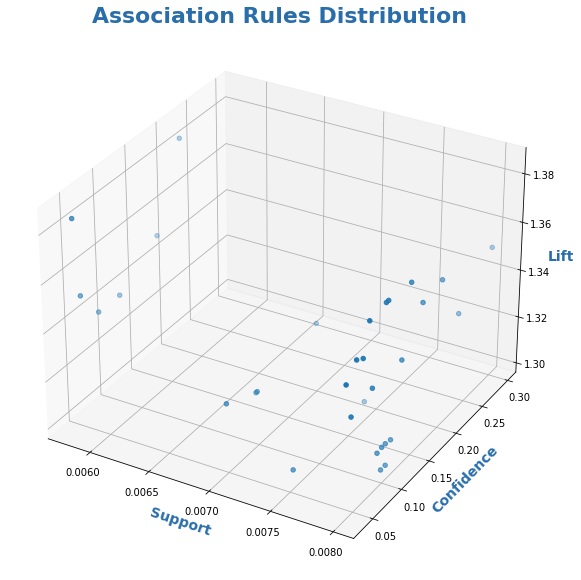

In [35]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection = '3d')

ax.set_xlabel("Support", fontsize= 14, fontweight='bold', color ='#296eaa')
ax.set_ylabel("Confidence", fontsize= 14, fontweight='bold', color ='#296eaa')
ax.set_zlabel("Lift", fontsize= 14, fontweight='bold', color ='#296eaa')

ax.scatter(asso_rules['support'], asso_rules['confidence'], asso_rules['lift'])
ax.set_title("Association Rules Distribution", fontsize= 22, fontweight='bold', color ='#296eaa')

plt.show()
# (Yenwee, 2022)

* Support: is a metric that explain how frequent a transaction itemset is in the transaction dataset. The top 3 itemsets have the same support 0.0058. The top 3 items are 0.6% popular in the 10,000 transactions.
* Lift: is meteric that explain how likely an item will be purchased in an itemset is purchased. A Lift greater than shows that the items is more likely to be purchased when the itemset is purchased. The top 1 transaction shows a lift of 1.351855 which tells that the second is high likely to be purchased with the itemset.
* Confidence: is the confidence metric of how likely a an items is purchased when another item or itemset is purchased. The top 1 transaction has a confidence of 0.167630. Meaning that both itemset and item are purchased (16.76 %) of the time together in the dataset.
Example:
Customers who are buying frozenset({'DeviceProtection', 'StreamingTV', 'OnlineBackup', 'TechSupport'}) are more likely to buy  frozenset({'DSL', 'OnlineSecurity'}). with support of 0.6% and a lift of 1.35 and a confidence of 16.78%


<h2> <a id="A1"> D2:PRACTICAL SIGNIFICANCE OF FINDINGS </a> </h2>

The findings show that this analysis is useful to the marketing departement. It will allow the department to appropriately take data driven decision about the products that can basketed together.

<h2> <a id="A1"> D3:COURSE OF ACTION </a> </h2>

The analysis shows that the WGU Telecommuncations company will be able to recommend a product or products to its customers based on what they put in their shopping carts. The recommendation is to add an product recommendation engine to the company shpping website. This will help on upselling customers with products they might be interested in. Therefore, increase in sales and profits.

<h2> <a id="A1"> E:PANOPTO RECORDING </a> </h2>

[Link to Panopto Video](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=ec2db306-d582-4516-81cb-ae87004fd4d9)

<h2> <a id="A1"> F:WEB SOURCES  </a> </h2>

Lim, Yenwee. 04/08/2022.
<https://towardsdatascience.com/data-mining-market-basket-analysis-with-apriori-algorithm-970ff256a92c>

<h2> <a id="A1"> H:SOURCES </a> </h2>

Shah, Tirth. 06/20/2021. <https://medium.com/nerd-for-tech/market-basket-analysis-1c38613fdd6b#:~:text=What%20Actually%20is%20Market%20Basket%20Analysis%3F%20Market%20basket,products%20that%20are%20likely%20to%20be%20purchased%20together.>